In [2]:
using Pkg

Pkg.activate("..")

using Revise
using Plots

# Introduction

This notebook will detail the derviation and rationale for the using the metabolic model to model the temperature dependence of bacterial systems. I will:

1. Derive the model structure for this metabolic model
3. Explain how temperature dependence can be incorporated into the framework.
4. Discuss how we might parameterise the model 

# Deriving the metabolic model
## A Basic Growth Model

I start with the fundamental observation that the carbon biomass ($x$) growth rate of the bacterial population $i$ is given by the gain of carbon $U_i$ minus the losses $D_i$:

\begin{align}
    \frac{1}{x_i}\frac{dx_i}{dt} = U_i - D_i
\end{align}

Given that the end goal of this endevor is to model the emergent total metabolism of the community we can seperate this loss term into carbon that is lost due to respiration $R_i$(i.e. as $\text{CO}_2$), and carbon that is lost and released into the enviroment $L_i$ giving:

\begin{align}
    \frac{1}{x_i}\frac{dx_i}{dt} = U_i - R_i - L_i
\end{align}

Following the work of Manzoni & Porporato ([2009](https://www.sciencedirect.com/science/article/pii/S0038071709000765)), we can further partition these repiratory losses into those that reflect the cost of mainentence,$R_{m_i}$ and that which occurs as a result of growth $R_{g_i}$ such that $R_i = R_{m_i} + R_{g_i}$. 

\begin{align}
    \frac{1}{x_i}\frac{dx_i}{dt} = U_i - R_{g_i} - R_{m_i} - L_i
\end{align}

Growth respiration here represents the loss of carbon that occurs due inefficency of metabolising certain carbon sources ([Gommers et al. 1988](https://onlinelibrary.wiley.com/doi/abs/10.1002/bit.260320112)) whilst maintenance respiration represents the costs of processes such as protein and nucleic acid turnover, osmoregulation and motility ([Chapman & Grey 1986](https://www.sciencedirect.com/science/article/pii/0038071786900957)). I seperate these two types of respiration as it allows the links to the processes that these types of respiration depended on to be expressed fully

As growth respiration is associated with assimilating carbon uptake into biomass it should be related to the magnitude of uptake (i.e. $R_{g_i} = f(U_i)$). This relationship is most commonly assumed to be linear with a fixed proportion of uptake being lost via growth respiration, $R_{g_i} = p_{R_g} U_i$. I assume here that maintenence respiration, the other source of carbon loss, is constant with regards to uptake, with the total carbon loss from maintenence being proportional to the amount of biomass. Including this in the total growth model above gives:

\begin{align}
    \frac{1}{x_i}\frac{dx_i}{dt} = U_i - p_{R_g} U_i - R_{m_i} - L_i
\end{align}

Similarly we can link the non-respiratory loss of carbon $L_i$ to the processes occuring within the cell. As this loss term is mostly due to the inefficency of metabolising carbon uptake (with the contribtion of processes such as cell mortality being negligble) we can also link it to carbon uptake, assuming a fixed proportion is lost via this route $L_i = p_{L} U_i$:

\begin{align}
    \frac{1}{x_i}\frac{dx_i}{dt} &= U_i - p_{R_g} U_i - R_{m_i} - p_L U_i \\
                                 &= U_i (1 - p_{R_g} - p_L) - R_{m_i}\\
\end{align}

## Multiple Carbon Sources
The equation above represents the growth of a population with respect to some arbitrary rate of carbon uptake $U_i$. Real populations can be resource limited (leading to a dependence of uptake on resource avaliblity) and will feed across multiple carbon sources. Thus, we can represent the uptake of carbon by species $i$ across $M$ carbon sources ($y_j$) as:

\begin{align}
U_i = \sum_{j=1}^M u_{ij} y_j
\end{align}

 Where $u_{ij}$  represents the per biomass uptake rate of resource $j$ by species $i$. Note that this rate is described by the first order term here but could follow a more complex function of resource avalibility.

As the rates of growth respiration $R_g$ and the loss of carbon to the enviroment $L_i$ are dependent on uptake we can assume that their values will vary across the $M$ carbon sources. We can indicate this by including the $j$ index, letting us rewite the growth equation as:

\begin{align}
    \frac{1}{x_i}\frac{dx_i}{dt} = \left(\sum_{j=1}^M u_{ij} y_j  (1 - {p_{R_g}}_j - {p_L}_j) \right) - R_{m_i}
\end{align}


We can further expand this by considering that the loss of carbon to the enviroment will actually occur via the release of carbon in multiple forms (due to the breakdown of more complex compunds) and can be expressed as sum of losses across $M$ carbon compounds $P_{L_j} = \sum_{k=1}^{M} l_{jk}$ where entries of the matrix $l_{jk}$ represent the proportion of uptake of resource $j$ that is released as resource $k$. This release allows the cross-feeding interactions that characterise microbial systems to be represented in the dynamics and results in the final growth model for population $i$:

\begin{align}
    \frac{1}{x_i}\frac{dx_i}{dt} = \left(\sum_{j=1}^M u_{ij} y_j  (1 - {p_{R_g}}_j - \sum_{k=1}^{M} l_{jk}) \right) - R_{m_i}
\end{align}

## Resource Model

Now we have derived an equation describing the growth of a bacterial species, we need to write the set of equations describing resource dyanmics. These equations follow fairly naturally from the popualtion dynamics when enforcing mass conservation. As with carbon biomass the amount of resource $j$ in the enviroment must be determined by the rate at which it enters ($I$) minus the rate at which it leaves ($L$):

\begin{align}
    \frac{dy_j}{dt} = I_j - L_j
\end{align}

The change in carbon resource avaliblity can be attributed either to abiotic processes (which we represent here through the inflow term $\rho_j$ and burial/degredation term $y_j \omega_j$ ) or through the activity of the bacterial community which takes up resource $j$ at the rate $U_j$ and releases it (via the inefficency of uptake) through the $L_j$ term:

\begin{align}
    \frac{dy_j}{dt} = \rho_j - y_j \omega_j - U_j + L_j
\end{align}

We can get the rates of uptake and release by the community by summing across all $N$ species in the community and across all $M$ resources which they release as a result of the $L_j$ term:

\begin{align}
    \frac{dy_j}{dt} = \rho_j - y_j \omega_j - \sum_{i = 1}^{N} \left( y_j x_i u_{ij}  - \sum_{k = 1}^{N} x_i y_k u_{ik} l_{kj} \right)
\end{align}

So overall the change in enviromental carbon in the form of resource $j$ is equal to the intrinsic rate of change ($\rho_j$) minus the net effect of each bacterial population. This net effect is made up of the uptake (the first term) and the release via the inefficent uptake of other carbon sources (the last). 

Combined this gives the total system of equations:

\begin{align}
        \frac{1}{x_i}\frac{dx_i}{dt} &= \left(\sum_{j=1}^M u_{ij} y_j  (1 - {p_{R_g}}_j - \sum_{k=1}^{M} l_{jk}) \right) - R_{m_i} \\
    \frac{dy_j}{dt} &= \rho_j - y_j \omega_j - \sum_{i = 1}^{N} \left( y_j x_i u_{ij}  - \sum_{k = 1}^{N} x_i y_k u_{ik} l_{kj} \right)
\end{align}

# Measuring Interactions
One natural question that emerges when looking at ecological systems is how the nature of interactions between species affects the dynamics and functioning. Whilst in many models such as the generalised Lotka-Volterra this is explicit in the equations this is not the case in the metabolic model described here. This is because consumers do not interact directly but rather through uptake and release of intermediate resources. 

A further consquence of this is that the nature of interactions between species can change depending on the resource environment they are in. Consider a simple system with two consumers and two resources. Both these species compete for one of the resources whilst the other is metabolised by one consumer, creating a by-product the other uses in the process. It is clear that in such a system the nature of interactions between the two consumers will depend on the resource environment; if only the first resource is present then the species will appear to compete, if only the second is present then it will look like facilitation.

To account for this we use a measure of interactions that explicitly accounts for the external resource envrionment. Writing the system of equations for growth in terms of the functions $f(\cdot)$ and $g(\cdot)$: 

\begin{align}
    \frac{dx_i(t)}{dt}  &= x_i(t) f_i(\vec{y}) \\
    \\
    \frac{dy_k(t)}{dt} &= g_k(\vec{x},\vec{y})
\end{align}

we define the total effect of species $i$ on $j$ as:

\begin{align}
    a_{ij} = \sum_{k = 0}^M \frac{dg_k(\vec{x},\vec{y})}{dx_i(t)} \frac{df_j(\vec{y})}{dy_k(t)}
\end{align}

In other words the sum of effects of species $i$ on resource $k$ weighted by the effect of resource $k$ on the growth of $j$ across all $M$ resources. Looking at the potential sign of these terms we can see how the correct interaction sign emerges. $\frac{dg_k(\vec{x},\vec{y})}{dx_i(t)}$ can be positive (if the $x_i$ is a net producer), negative (if $x_i$ is a net consumer) or $0$ (if $x_i$ does not uptake or leak the resource). $\frac{df_j(\vec{y})}{dy_k(t)}$ is either positive (if $x_j$ consumes the resource $k$) or $0$ (if it does not) with the magnitude of uptake determining the strength of the interaction. 


For the model equations above this gives:

\begin{align}
    a_{ij} = \sum_{k=0}^{M} \left[ \left(-y_k u_{ik} + \sum_{l=0}^M y_l u_{il} l_{lk}\right) \left(u_{jk} \left(1 - \sum_{l=0}^M l_{kl} \right) \right) \right]
\end{align}


with the terms in the first bracket representing competition and faciliation respectively. 

# Parameters

So there are 4 main parameters that we need for this model:
1. Uptake matrix
2. Maintenece Respriaton
3. Growth Respiration
4. Leakage matrix

But how do we get estimates for these?

## Uptake + Leakage

### Structure
Based on the approach used by the niche model I generate uptake matrix structures. The algorithm is follows:
* Draw $\theta$ values for $N$ consumers and $M$ resources from a uniform distribution in the interval $[0,1]$

In [5]:
N,M = 50,50
#generating u and l structures
consumer_θ = sort(rand(N))
resource_θ = sort(rand(M));

#### Uptake

* Generate an $N \times M$ matrix where the element $d_{ij}$ gives the $\theta$ distance from consumer $i$ to resource $j$.

* Generate a matrix according to the rules: 
    
    $u_{ij} = \begin{cases}
                  f(d_{ij}) \ &\text{if}  |d_{ij}| < o \\
                  0 \ &\text{if} |d_{ij}| \geq o
              \end{cases}$ 
                                                             
    where $f(d_{ij})$ is some function of the distance (e.g. a gaussian) and $o$ is some distance threshold.

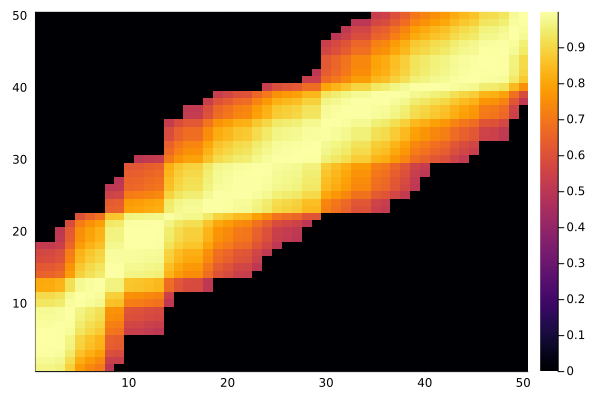

In [7]:
#constructing u - use gaussian function of distance
σ = 0.1
θ_min = 0.5

u = exp.( (-abs.(consumer_θ .- resource_θ').^2)/ σ )
u[u .< θ_min] .= 0.0;

heatmap(u)

#### Leakage
* Generate an $M \times M$ matrix where the element $d_{ij}$ gives the $\theta$ distance from resource $i$ to resource $j$.

* Generate a matrix according to the rules: 
    
    $l_{ij} = \begin{cases}
                f(d_{ij}) \ &\text{if}  d_{ij} < o \\
                0 \ &\text{if} d_{ij} \geq o
              \end{cases}$ 
                                                             
    where $f(d_{ij})$ is some function of the distance (e.g. a gaussian) and $o$ is some distance threshold. Note the distance is signed preventing leakage to resources with higher $\theta$ values. 

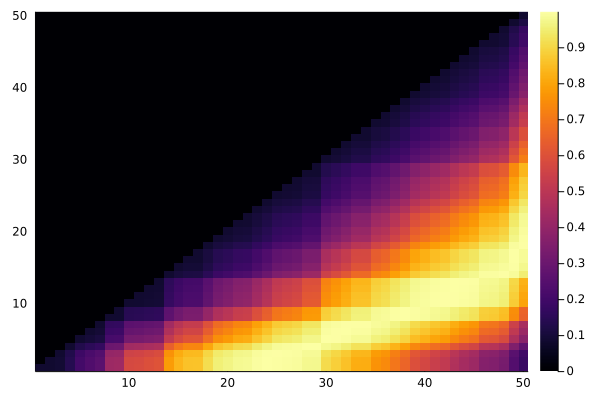

In [13]:
#constructing l - gaussian function of distance, bounded leftward at 0
l_dist = resource_θ .- resource_θ'
zero_indx = (l_dist .> 0.0)

σ = 0.1
l̄ = 0.5

l = exp.(-( (l_dist .+ l̄).^2) ./ σ )
l[zero_indx] .= 0.0
# [l[i,:] .= 0.3 * l[i,:]./sum(l[i,:]) for i = 1:M ];

heatmap(l)

## Maintainence Respiration

There is a fairly large body of work considering the importance of microbial maintenence respiration with various models and experiments aiming to understand its dynamics.

We may be able to estimate the amount of respiration that originates from this process in relation to the total respiration of a given population by using these papers. For example [Price & Sowers (2004)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC384798/) estimate the ratio of metabolic rates for bacteria in growth and maintence phases to be $10^3 : 1$. We need to look at more papers for this as this ratio seems very high.

The same paper also looks at the temperature dependence of metabolism across these two phases, finding no difference. This could be very helpful as it indicates that the total respiratory temperature dependence should be equal to the temperature dependence of each part individually...

## Growth respiration

As it stands in the model, growth respiration is the fixed proportion of each carbon source that is lost as $CO_2$ when it is metabolised. Thus, it takes the form of a vector with length $M$. In theory we can set a limit to the values in this vector based on the fact that the metabolism of many carbon sources will not allow total conversion of carbon mass. This should hold true for more complex carbon compunds though the proportion respired should increase as the molecules get more simple (i.e. i imagine the consumption of something simple like glucose should be relatively straightforward and efficent). 

This point is backed up by the work of [Gommers et al. (1988)](https://onlinelibrary.wiley.com/doi/abs/10.1002/bit.260320112) who estimate that around $12\%-29\%$ of substrate is released as $CO_2$ during metabolism (A nice range to work with?).

In terms of temperature dependence the proportion of carbon respired per unit input should not change with temperature (i.e. $p_{R_g}$ above) though the supply of material to metabolise (via the uptake term) will. 